In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df. fillna(df['Age']. value_counts(). index[0])

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,24,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,24,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,24,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,24,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,24,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df = df.fillna(df.median())

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As per this we got to know that 38.8% are survived and ages in the ship also 0.42 to 80  and as per data we can remove name because name is not that muc importnt for calcualting

as per the data set i feel like cabin name passenger id and ticket is not used for prediction ,i mean its not that much importance

In [10]:
df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,24.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


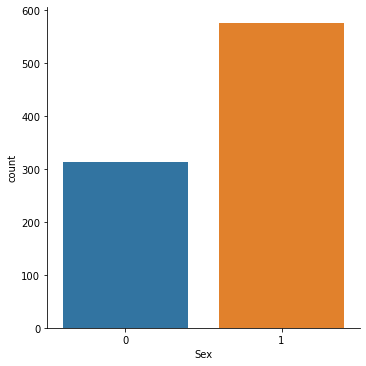

In [13]:
sns.factorplot('Sex',data=df,kind='count')

#The Gender plot shows male contestants are more

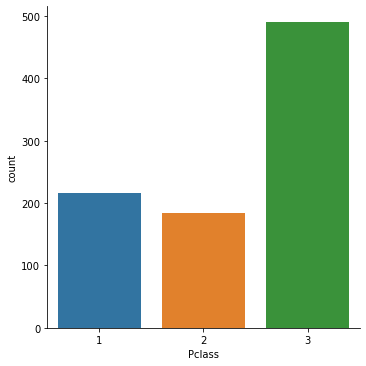

In [14]:
# class plot

sns.factorplot('Pclass',data=df,kind='count')

#Shows in pclass class 3 are more

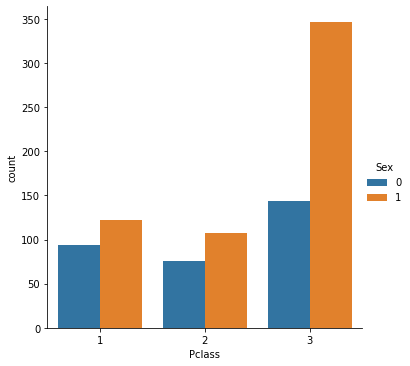

In [15]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

In [16]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)

In [17]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,0
2,1,3,0,26.0,0,0,7.9250,S,0
3,1,1,0,35.0,1,0,53.1000,S,0
4,0,3,1,35.0,0,0,8.0500,S,1
5,0,3,1,24.0,0,0,8.4583,Q,1
6,0,1,1,54.0,0,0,51.8625,S,1
7,0,3,1,2.0,3,1,21.0750,S,child
8,1,3,0,27.0,0,2,11.1333,S,0
9,1,2,0,14.0,1,0,30.0708,C,child


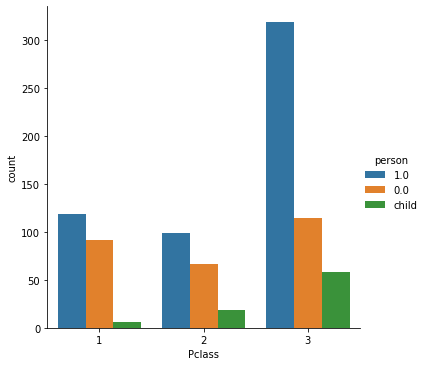

In [18]:
sns.factorplot('Pclass',data=df,hue='person',kind='count')

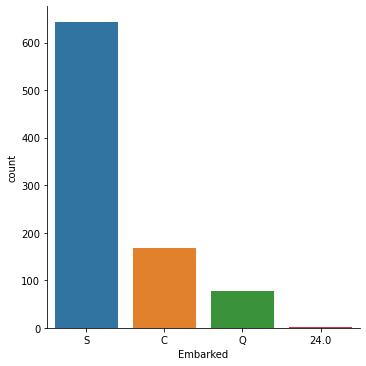

In [19]:
sns.factorplot('Embarked',data=df,kind='count')

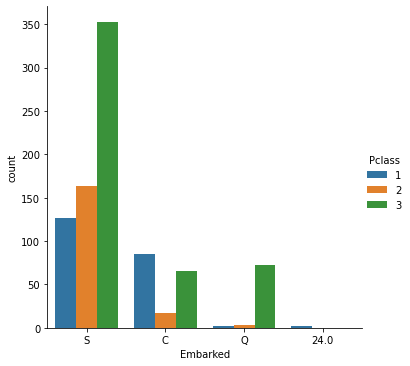

In [20]:
sns.factorplot('Embarked',data=df,hue='Pclass',kind='count')

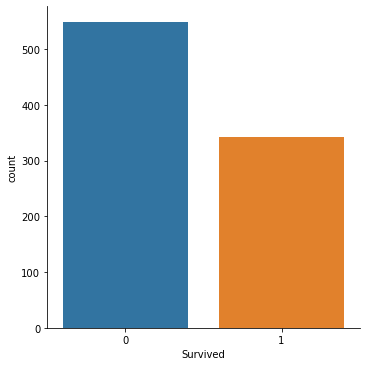

In [21]:
sns.factorplot('Survived',data=df,kind='count')

<AxesSubplot:>

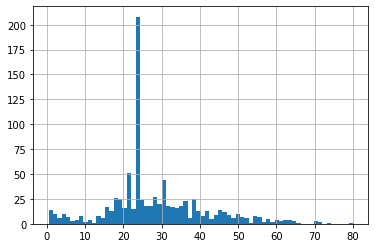

In [22]:
df['Age'].hist(bins=70)

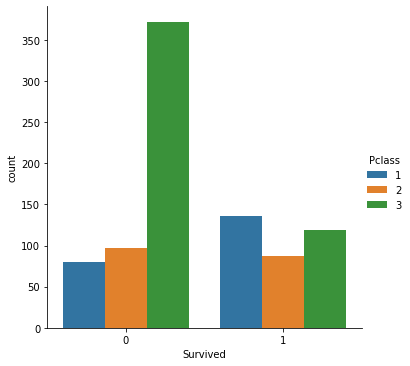

In [23]:
sns.factorplot('Survived',data=df,kind='count',hue='Pclass')

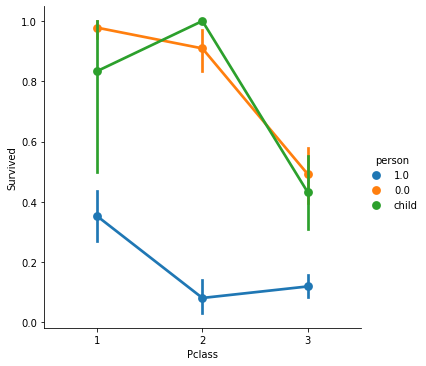

In [24]:
sns.factorplot('Pclass','Survived',data=df,hue='person')

#As the graph shows that the survival rate for male is very low and in that 3rd class passengers rate si very very low

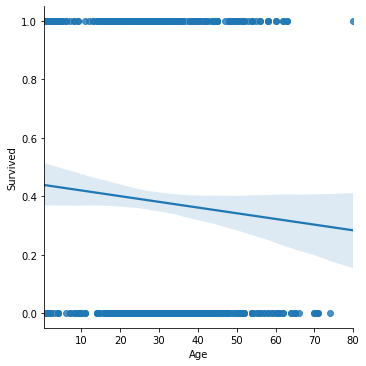

In [25]:
sns.lmplot('Age','Survived',data=df)

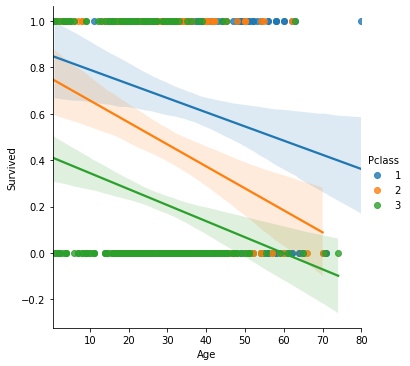

In [26]:
sns.lmplot('Age','Survived',data=df,hue='Pclass')

#older the passenger survival rate is very less

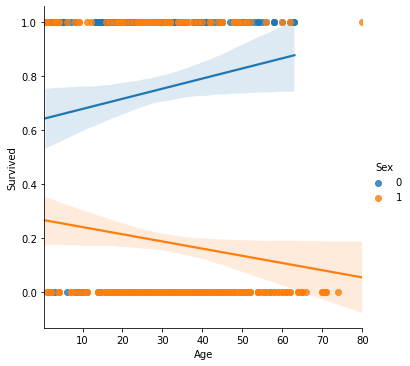

In [27]:
sns.lmplot('Age','Survived',data=df,hue='Sex')

#As Age increases the survival rate is less and it is more in male

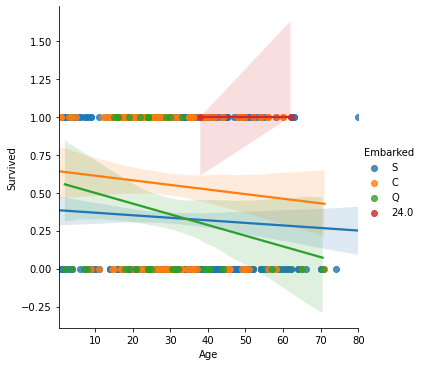

In [28]:
sns.lmplot('Age','Survived',data=df,hue='Embarked')

#Shockingly, the number of passengers boarded at Southhampton are more compared to Cherbourg and Queenstown but the survival rate is high for Cherbour passengers than Southhampton.

In [29]:
df.drop(['person'],axis=1,inplace=True)

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,24.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [31]:
df=df.replace({"Embarked":{'S':0,'C':1,'Q':2}})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,24.0,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


In [32]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307,0.105814
Pclass,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500,-0.043016
Sex,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333,-0.114343
Age,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554,0.044520
SibSp,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651,-0.049488
Parch,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225,-0.058689
Fare,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000,0.070994
Embarked,0.105814,-0.043016,-0.114343,0.044520,-0.049488,-0.058689,0.070994,1.000000


<AxesSubplot:>

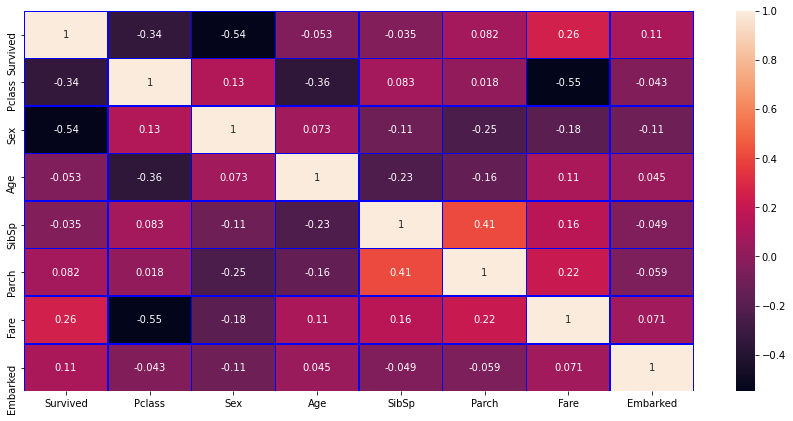

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='blue')

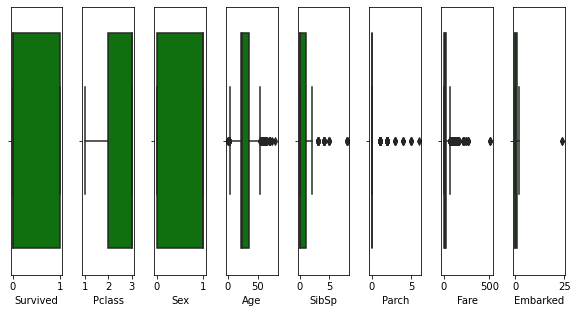

In [34]:
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

In [35]:
from scipy.stats import zscore
import numpy as np

In [36]:
z=np.abs(zscore(df.iloc[:,:-1]))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.43279337, 0.47367361,
        0.50244517],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.43279337, 0.47367361,
        0.78684529],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.4745452 , 0.47367361,
        0.48885426],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.43279337, 2.00893337,
        0.17626324],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.4745452 , 0.47367361,
        0.04438104],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.4745452 , 0.47367361,
        0.49237783]])

In [37]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [38]:
df_new=df[(z<3) .all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,24.0,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


In [39]:
print(df.shape)
print(df_new.shape)

(891, 8)
(820, 8)


In [40]:
loss_percent=(891-820)/891*100
print(loss_percent)

7.968574635241302


In [41]:
df_new.skew()

Survived     0.450825
Pclass      -0.632242
Sex         -0.664152
Age          0.564753
SibSp        1.979577
Parch        2.122629
Fare         2.318761
Embarked    13.830191
dtype: float64

Pclass and Sex are Negitively Skewed and SibSp,Parch,Fare and Embarked are Positively Skewed

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

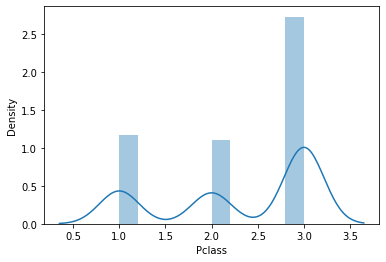

In [42]:
sns.distplot(df_new['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

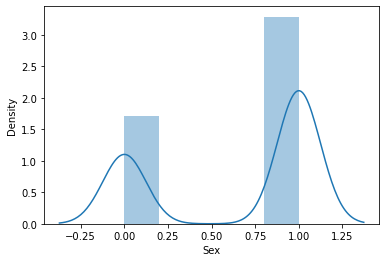

In [43]:
sns.distplot(df_new['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

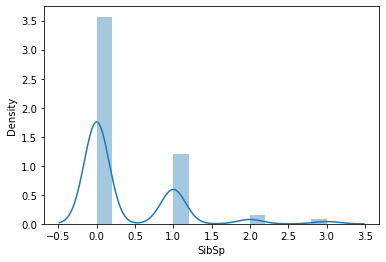

In [44]:
sns.distplot(df_new['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

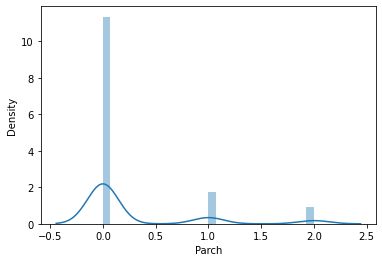

In [45]:
sns.distplot(df_new['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

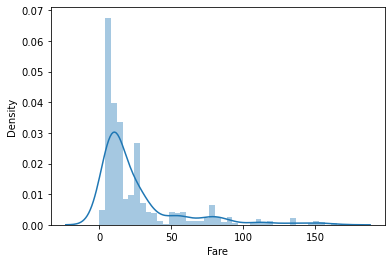

In [46]:
sns.distplot(df_new['Fare'])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

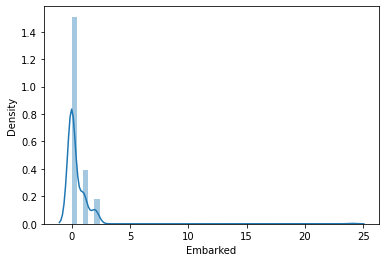

In [47]:
sns.distplot(df_new['Embarked'])

In [48]:
X = df_new.drop(columns = ['Survived'],axis=1)
Y = df_new['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0.0
1,1,0,38.0,1,0,71.2833,1.0
2,3,0,26.0,0,0,7.9250,0.0
3,1,0,35.0,1,0,53.1000,0.0
4,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.0
887,1,0,19.0,0,0,30.0000,0.0
888,3,0,24.0,1,2,23.4500,0.0
889,1,1,26.0,0,0,30.0000,1.0


In [49]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

#Do the skewness using StandardScaler

In [50]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method="yeo-johnson")

In [51]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X=sd.fit_transform(X)
X

array([[ 0.87283049,  0.72203588, -0.48915262, ..., -0.48469263,
        -0.83470177, -0.61636424],
       [-1.47067587, -1.38497273,  0.77694225, ..., -0.48469263,
         1.55364494,  1.56932577],
       [ 0.87283049, -1.38497273, -0.15643285, ..., -0.48469263,
        -0.74331399, -0.61636424],
       ...,
       [ 0.87283049, -1.38497273, -0.3211492 , ...,  2.08665417,
         0.39490799, -0.61636424],
       [-1.47067587,  0.72203588, -0.15643285, ..., -0.48469263,
         0.65432009,  1.56932577],
       [ 0.87283049,  0.72203588,  0.32078503, ..., -0.48469263,
        -0.76629016,  1.72488958]])

In [52]:
from sklearn.model_selection import train_test_split                                                                                      

In [53]:
print(X.shape)
print(Y.shape)

(820, 7)
(820,)


In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.20)

In [55]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(656, 7)
(656,)
(164, 7)
(164,)


In [56]:
Y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
smt=SMOTE()
X_train, Y_train = smt.fit_resample(X_train, Y_train)

In [59]:
X_train


array([[-1.47067587, -1.38497273,  1.21603656, ..., -0.48469263,
         0.57121189,  1.56932577],
       [-1.47067587, -1.38497273,  0.55121104, ..., -0.48469263,
         2.20408981, -0.61636424],
       [ 0.87283049,  0.72203588, -0.3211492 , ..., -0.48469263,
         0.22519543, -0.61636424],
       ...,
       [ 0.87283049, -1.38497273, -0.3211492 , ..., -0.48469263,
        -0.74928106,  1.72488958],
       [-1.47067587, -0.31611613,  1.67515601, ..., -0.48469263,
         1.92125536, -0.61636424],
       [ 0.87283049, -1.38497273, -0.88743139, ..., -0.48469263,
        -0.75809617,  1.72488958]])

In [60]:
Y_train

0      1
1      1
2      0
3      1
4      0
      ..
787    1
788    1
789    1
790    1
791    1
Name: Survived, Length: 792, dtype: int64

In [61]:
print(X_train.shape)
print(Y_train.shape)


(792, 7)
(792,)


In [62]:
np.bincount(Y_train)

array([396, 396], dtype=int64)

In [63]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
lm.fit(X_train,Y_train)

LogisticRegression()

In [65]:
lm.score(X_train,Y_train)

0.7752525252525253

In [66]:
pred=lm.predict(X_test)
print("predicted result score:",pred)
print("actual score:",Y_test)

predicted result score: [0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0]
actual score: 693    0
364    0
75     0
739    0
432    1
      ..
229    0
231    0
484    1
829    1
721    0
Name: Survived, Length: 164, dtype: int64


In [67]:
print("Accuracy_score:",accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

Accuracy_score: 0.8292682926829268
[[87 17]
 [11 49]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       104
           1       0.74      0.82      0.78        60

    accuracy                           0.83       164
   macro avg       0.82      0.83      0.82       164
weighted avg       0.83      0.83      0.83       164



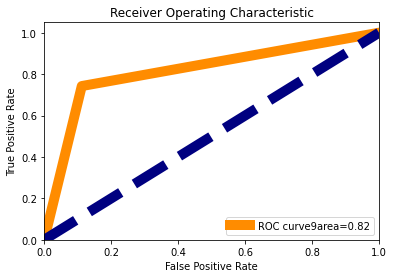

In [68]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,Y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve9area=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#Tuning parameter using grid search CV

In [69]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7776898734177216


#Decision Tree Classifier

In [70]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [71]:
pred1=dtc.predict(X_test)

In [72]:
print('Accuracy::',accuracy_score(Y_test,pred1))
confusion_matrix(Y_test,pred1)

Accuracy:: 0.8109756097560976


array([[87, 17],
       [14, 46]], dtype=int64)

In [73]:
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       104
           1       0.73      0.77      0.75        60

    accuracy                           0.81       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.81      0.81      0.81       164



#hyper Tuning for Decision Tree

In [74]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"max_depth":range(1,10),"min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}


In [75]:
grid_search_cv = GridSearchCV(dtc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(X_train,Y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [76]:
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 7}
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=7)
0.8117563291139239


#Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)
print('Accuracy::',accuracy_score(Y_test,Y_pred2))
print(classification_report(Y_test, Y_pred2))

Accuracy:: 0.8353658536585366
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.79      0.75      0.77        60

    accuracy                           0.84       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.83      0.84      0.83       164



In [78]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [79]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       104
           1       0.78      0.77      0.77        60

    accuracy                           0.84       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.83      0.84      0.84       164



In [80]:
from sklearn.svm import SVC
svc = SVC(C= .1, kernel='linear', gamma= 1)
svc.fit(X_train, Y_train)
pred3 = svc.predict(X_test)
# check the accuracy on the training set
print(svc.score(X_train, Y_train))
print(svc.score(X_test, Y_test))

#CLassification matrix

print(classification_report(pred3, Y_test))

0.7676767676767676
0.823170731707317
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       109
           1       0.72      0.78      0.75        55

    accuracy                           0.82       164
   macro avg       0.80      0.81      0.81       164
weighted avg       0.83      0.82      0.82       164



In [81]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf','poly']} 

In [82]:
grid = GridSearchCV(SVC(), params, refit = True, verbose = 3)
#TUning the train set
grid.fit(X_train, Y_train)

print(grid.best_params_)
print(grid.best_estimator_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.836 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.805 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.722 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.791 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.848 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [85]:
#Classification
grid_predict = grid.predict(X_test)
print(classification_report(Y_test, grid_predict))
print(grid.best_score_)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       104
           1       0.76      0.73      0.75        60

    accuracy                           0.82       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.82      0.82      0.82       164

0.8093145450203009


In [84]:
#Accuracy Score
LR=print("Accuracy_score of Logistic:",accuracy_score(Y_test,pred))
DT=print('Accuracy_score of Decision Tree::',accuracy_score(Y_test,pred1))
RF=print('Accuracy_score of Random Forest::',accuracy_score(Y_test,Y_pred2))
SVM=print('Accuracy_score of Support Vector Machine::',accuracy_score(Y_test,pred3))

Accuracy_score of Logistic: 0.8292682926829268
Accuracy_score of Decision Tree:: 0.8109756097560976
Accuracy_score of Random Forest:: 0.8353658536585366
Accuracy_score of Support Vector Machine:: 0.823170731707317


In [86]:
 #Grid Search CV Score
    
print("accuracy score of logistic grid search :",lm_cv.best_score_)
print("accuracy score of Decision tree grid search :",grid_search_cv.best_score_)
print("accuracy score of SVM grid search :",grid.best_score_)

accuracy score of logistic grid search : 0.7776898734177216
accuracy score of Decision tree grid search : 0.8117563291139239
accuracy score of SVM grid search : 0.8093145450203009


In [98]:
#Cross Validation 

from sklearn.model_selection import cross_val_score

score=cross_val_score(lm,X,Y,cv=5)
print(score)
print(score.min(),score.mean(),score.max(),score.std())


[0.81707317 0.7804878  0.76829268 0.79268293 0.81097561]
0.7682926829268293 0.7939024390243904 0.8170731707317073 0.0182519872525558


#for Logistic the croos validation score is in between 1.76 to 0.817

In [100]:
from sklearn.model_selection import KFold
kfold=KFold(10)

score=cross_val_score(dtc,X,Y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.70731707 0.7804878  0.73170732 0.76829268 0.80487805 0.82926829
 0.81707317 0.73170732 0.7804878  0.79268293]
0.7073170731707317 0.774390243902439 0.8292682926829268 0.03788347455368066


In [101]:
from sklearn.model_selection import KFold
kfold=KFold(10)

score=cross_val_score(lm,X,Y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.80487805 0.81707317 0.75609756 0.80487805 0.76829268 0.76829268
 0.7804878  0.76829268 0.80487805 0.82926829]
0.7560975609756098 0.7902439024390244 0.8292682926829268 0.02364721881666501


In [102]:
score=cross_val_score(model2,X,Y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.7195122  0.81707317 0.75609756 0.81707317 0.85365854 0.82926829
 0.79268293 0.76829268 0.76829268 0.84146341]
0.7195121951219512 0.7963414634146342 0.8536585365853658 0.04046502444643184


In [103]:
score=cross_val_score(svc,X,Y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.80487805 0.81707317 0.76829268 0.81707317 0.75609756 0.79268293
 0.7804878  0.75609756 0.84146341 0.7804878 ]
0.7560975609756098 0.7914634146341464 0.8414634146341463 0.026967493155482886


#After validating using cross validation suggest random forest classifier is getting the highest score value of 85.3% so i suggest Random forest model is the best predictor

#Export the data

In [104]:
import pickle
filename="Titanic_Pred.pkl"
pickle.dump(lm,open(filename,'wb'))

In [106]:
import numpy as np
a=np.array(Y_test)
predicted=np.array(model2.predict(X_test))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [107]:
df_com

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
159,0,0
160,0,0
161,1,1
162,1,1
